Использованный датасет - Заработная плата рабочих мест в области Data Science - https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary?resource=download



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'data/Diamonds Prices2022.csv'
data = pd.read_csv(file_path)

# 1.1 Загрузка и сохранение данных
print("Загруженные данные:")
print(data.head())

# Сохранение данных в новый файл
output_file = 'data/Diamonds_Prices2022_processed.csv'
data.to_csv(output_file, index=False)
print(f"Данные сохранены в {output_file}")

# 1.2 Получение сведений о датафрейме
print("\nИнформация о датафрейме:")
data.info()

# 1.3 Получение сведений о колонках
print("\nНазвания колонок:", data.columns.tolist())

# 1.4 Вывод отдельных строк и столбцов
print("\nВывод первых 5 строк столбца 'cut':")
print(data['cut'].head())

print("\nВывод строк с 10 по 15:")
print(data.iloc[10:15])

# 1.5 Группировка и агрегация данных
print("\nСредняя цена по качеству огранки (cut):")
print(data.groupby("cut")["price"].mean())

# 1.6 Сортировка данных
print("\nСортировка данных по цене:")
sorted_data = data.sort_values(by='price', ascending=False)
print(sorted_data.head())

# 1.7 Удаление строк/столбцов
print("\nУдаление столбца 'x' (если он не нужен):")
# Убедитесь, что столбец 'x' существует в данных
if 'x' in data.columns:
    data_without_x = data.drop(columns=['x'], errors='ignore')
    print(data_without_x.head())
else:
    print("Столбец 'x' не найден в данных.")

# 1.8 Создание новых столбцов
print("\nДобавление нового столбца 'volume' (объем):")
# Убедитесь, что столбцы 'x', 'y' и 'z' существуют
if {'x', 'y', 'z'}.issubset(data.columns):
    data['volume'] = data['x'] * data['y'] * data['z']
    print(data.head())
else:
    print("Не все столбцы для вычисления объема ('x', 'y', 'z') присутствуют в данных.")

# 1.9 Удаление строк с пустыми значениями
print("\nУдаление строк с пустыми значениями:")
cleaned_data = data.dropna()
print(cleaned_data.head())

# 1.10 Заполнение пустых значений медианой
print("\nЗаполнение пустых значений медианой:")
data_filled = data.fillna(data.median(numeric_only=True))
print(data_filled.head())


Загруженные данные:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
Данные сохранены в data/Diamonds_Prices2022_processed.csv

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 


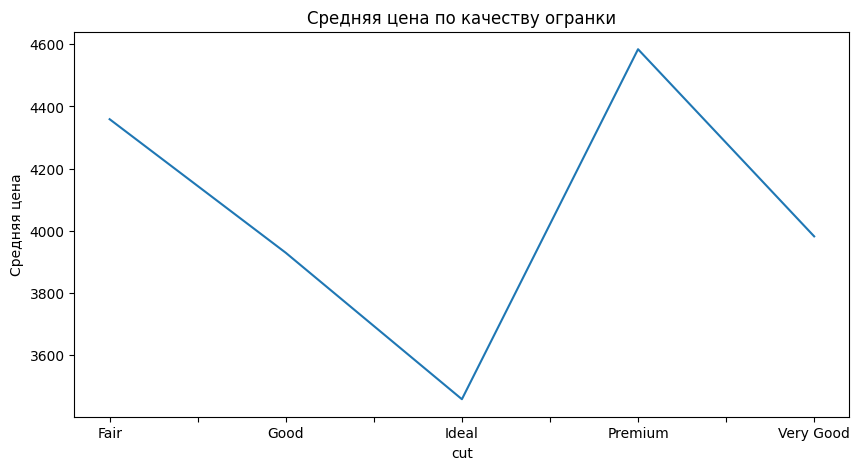

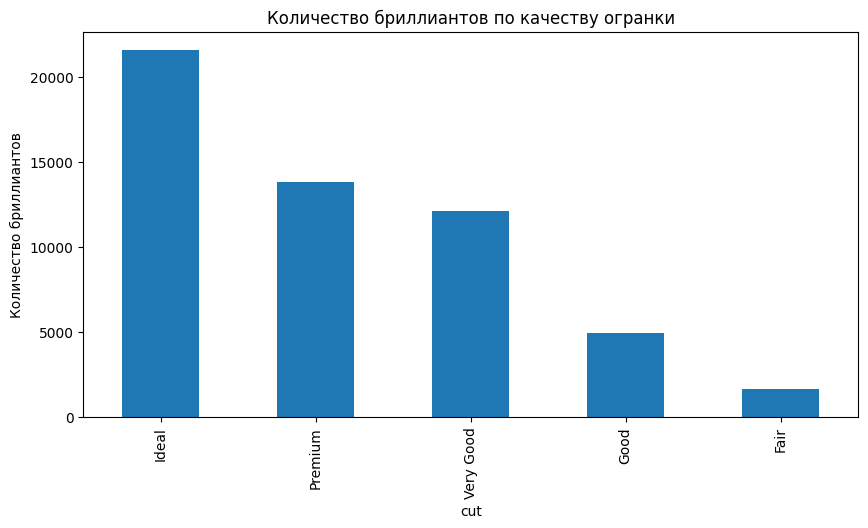

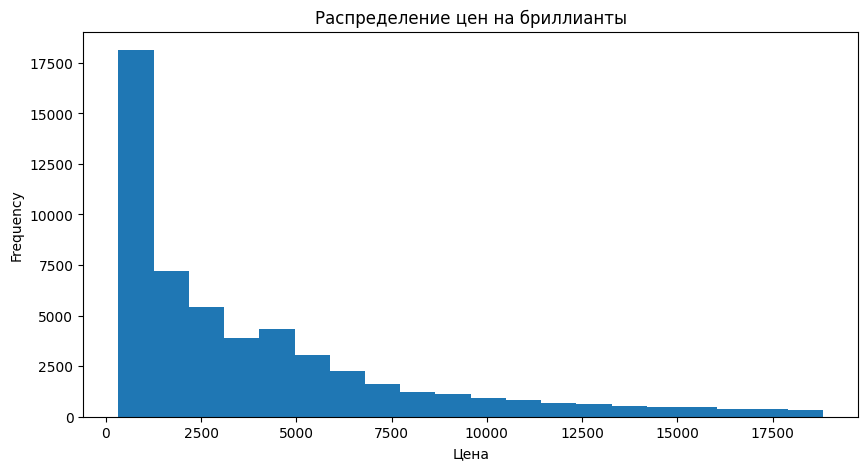

<Figure size 1000x500 with 0 Axes>

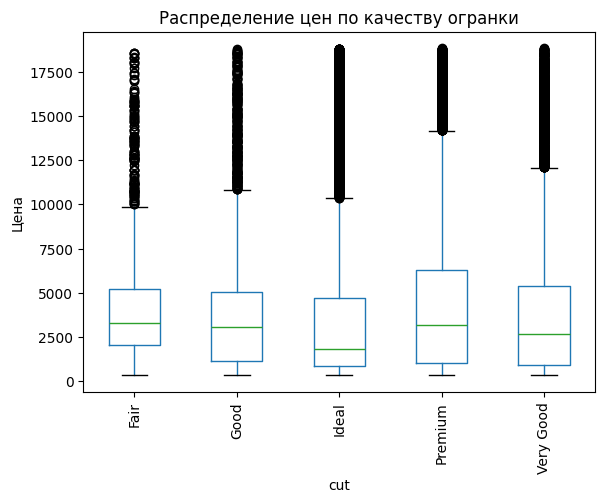

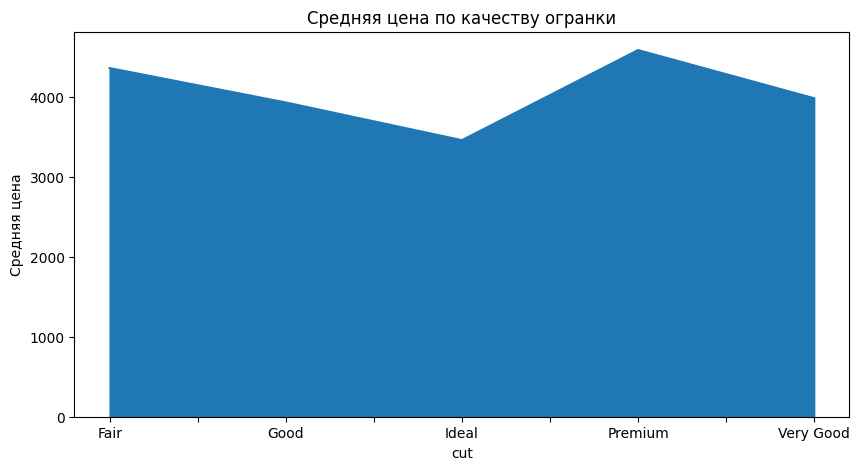

KeyError: 'volume'

<Figure size 1000x500 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'data/Diamonds Prices2022.csv'
data = pd.read_csv(file_path)

# 2.1 Линейная диаграмма (Средняя цена по качеству огранки)
plt.figure(figsize=(10, 5))
data.groupby("cut")["price"].mean().plot(
    kind="line", title="Средняя цена по качеству огранки"
)
plt.ylabel("Средняя цена")
plt.show()

# 2.2 Столбчатая диаграмма (Количество бриллиантов по качеству огранки)
plt.figure(figsize=(10, 5))
data["cut"].value_counts().plot(
    kind="bar", title="Количество бриллиантов по качеству огранки"
)
plt.ylabel("Количество бриллиантов")
plt.show()

# 2.3 Гистограмма (Распределение цен)
plt.figure(figsize=(10, 5))
data["price"].plot(kind="hist", bins=20, title="Распределение цен на бриллианты")
plt.xlabel("Цена")
plt.show()

# 2.4 Ящик с усами (Распределение цен по качеству огранки)
plt.figure(figsize=(10, 5))
data.boxplot(column="price", by="cut", grid=False, rot=90)
plt.title("Распределение цен по качеству огранки")
plt.suptitle("")
plt.ylabel("Цена")
plt.show()

# 2.5 Диаграмма с областями (Средняя цена по качеству огранки)
plt.figure(figsize=(10, 5))
data.groupby("cut")["price"].mean().plot(
    kind="area", title="Средняя цена по качеству огранки"
)
plt.ylabel("Средняя цена")
plt.show()

# 2.6 Диаграмма рассеяния (Цена vs. Объем)
plt.figure(figsize=(10, 5))
plt.scatter(data['price'], data['volume'], alpha=0.5)
plt.title('Диаграмма рассеяния: Цена vs Объем')
plt.xlabel('Цена')
plt.ylabel('Объем (x * y * z)')
plt.show()

# 2.7 Круговая диаграмма (Распределение огранок)
plt.figure(figsize=(10, 5))
data["cut"].value_counts().plot(
    kind="pie", title="Распределение огранок", autopct="%1.1f%%"
)
plt.ylabel("")
plt.show()
